<a href="https://colab.research.google.com/github/Margo-s-M/AI_Colab/blob/main/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [62]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [63]:
df.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


pclass int64  змінити на object

In [65]:
df['pclass'] = df['pclass'].astype(object)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    object 
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 55.7+ KB


<Axes: >

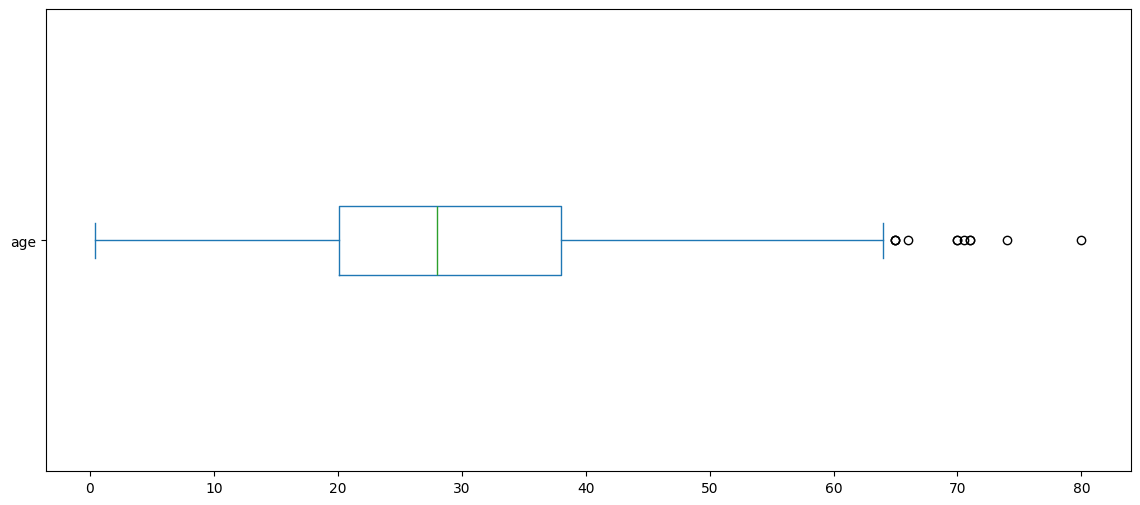

In [67]:
df['age'].plot(kind='box', vert=False, figsize=(14,6))

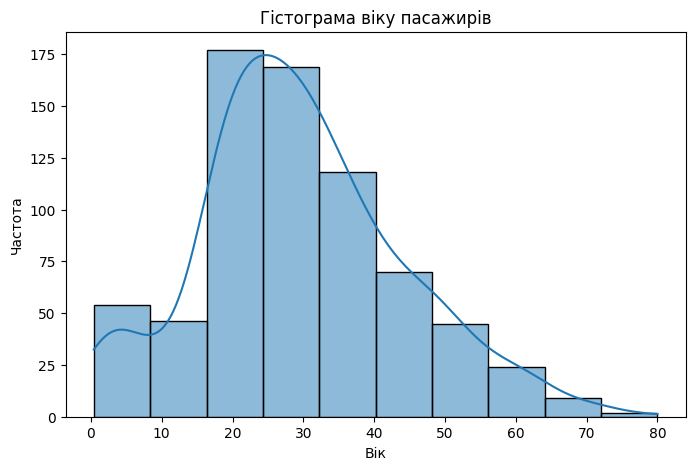

In [68]:
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=10, kde=True)
plt.title("Гістограма віку пасажирів")
plt.xlabel("Вік")
plt.ylabel("Частота")
plt.show()

<Axes: >

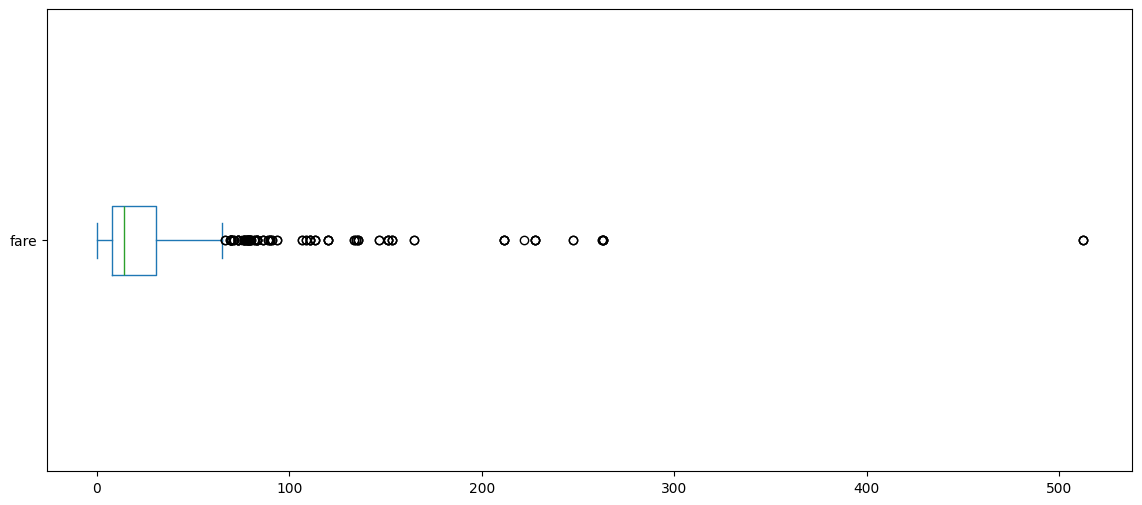

In [69]:
df['fare'].plot(kind='box', vert=False, figsize=(14,6))

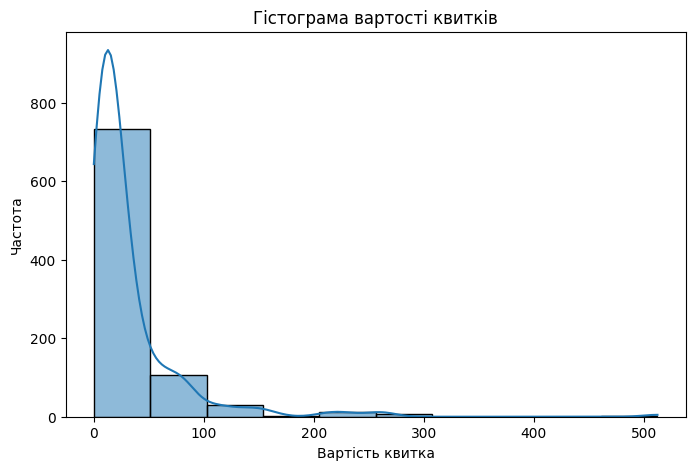

In [70]:
plt.figure(figsize=(8, 5))
sns.histplot(df["fare"], bins=10, kde=True)
plt.title("Гістограма вартості квитків")
plt.xlabel("Вартість квитка")
plt.ylabel("Частота")
plt.show()

In [71]:
def remove_outliers(df):
  column = df[fare]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 3*iqr
  upper = q3 + 3*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]
  remove_fare = remove_outliers(df['fare'])
  remove_age = remove_outliers(df['age'].dropna())


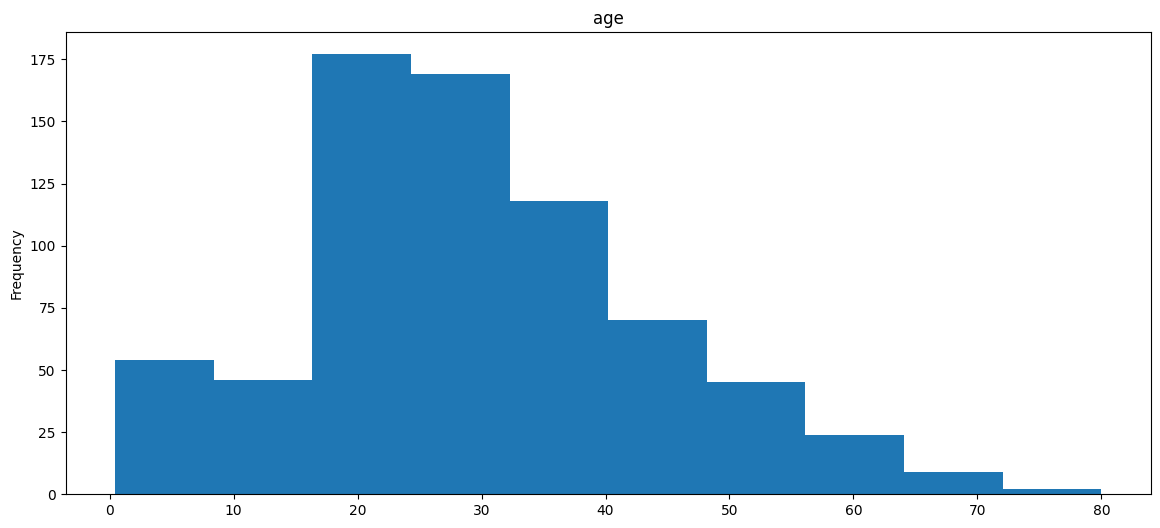

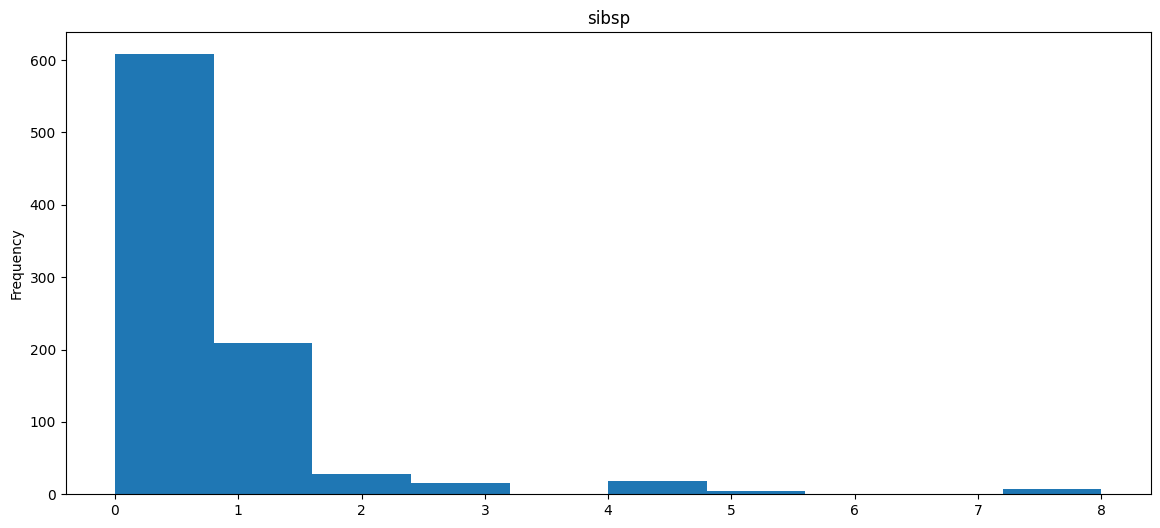

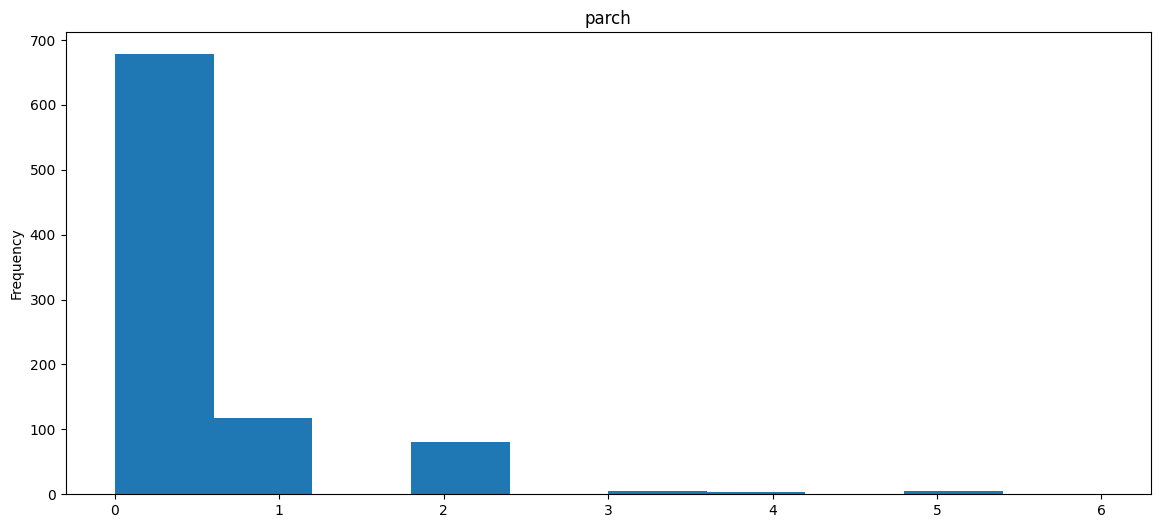

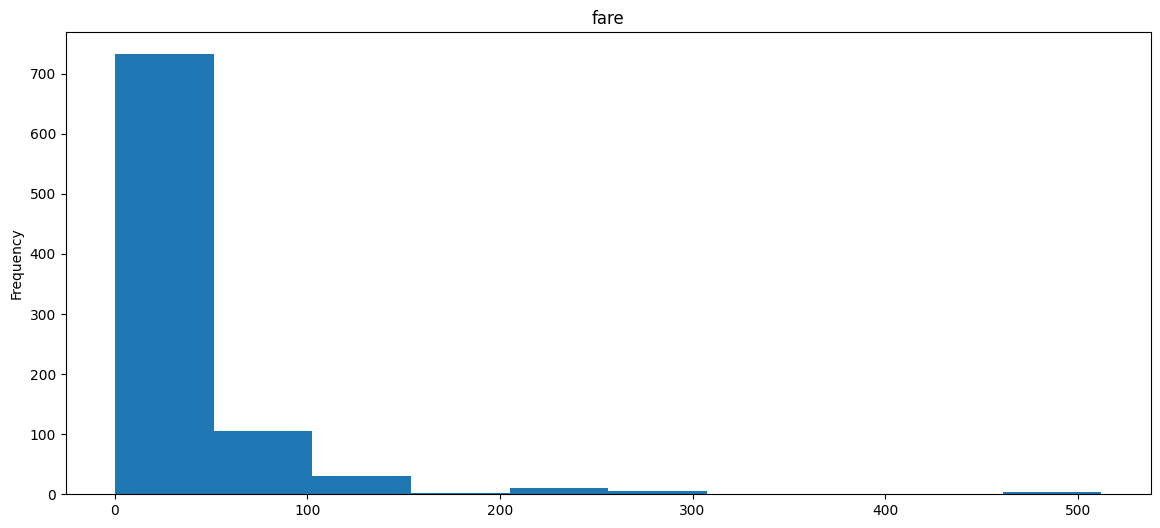

In [72]:
for col in df.select_dtypes(include='number').columns:
  df[col].plot(kind='hist', figsize=(14,6))
  plt.title(col)
  plt.show()

In [79]:
corr = df.select_dtypes(include='number').corr(method='pearson')

corr

,age,sibsp,parch,fare
age,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.308247,1.000000,0.414838,0.159651
parch,-0.189119,0.414838,1.000000,0.216225
fare,0.096067,0.159651,0.216225,1.000000


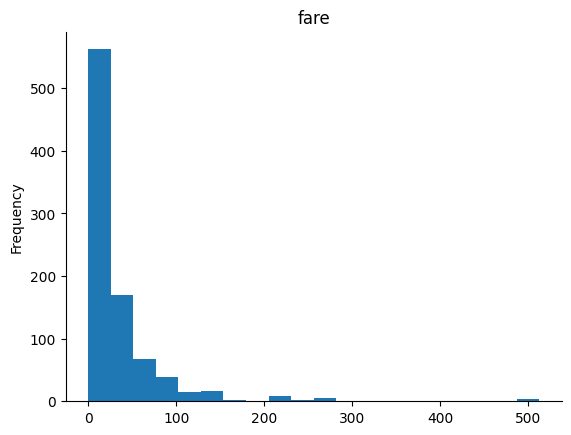

In [80]:
from matplotlib import pyplot as plt
df['fare'].plot(kind='hist', bins=20, title='fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

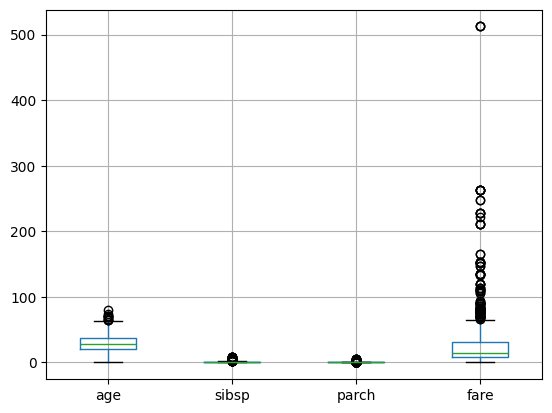

In [82]:
df.boxplot()

In [76]:
#fare має найбільшу кількість викидів , є сенс чистити

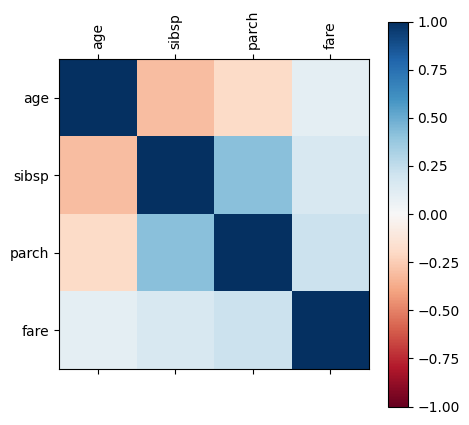

In [83]:
fig = plt.figure(figsize=(5, 5))
plt.matshow(corr, cmap='RdBu', fignum=False)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.clim(-1, 1)

In [78]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак - мінімум 2 ящика та гістограм
* аналіз категоріальних ознак - мінімум 1 груповий ящик
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

Зверніть увагу, що стовпчик `pclass` є по суті категоріальним, тому перед початком роботи змініть його тип даних на `object`

In [86]:
male_count = df[df["sex"] == "male"].shape[0]
female_count = df[df["sex"] == "female"].shape[0]
print(f"Кількість чоловіків: {male_count}")
print(f"Кількість жінок: {female_count}")

Кількість чоловіків: 577
Кількість жінок: 314


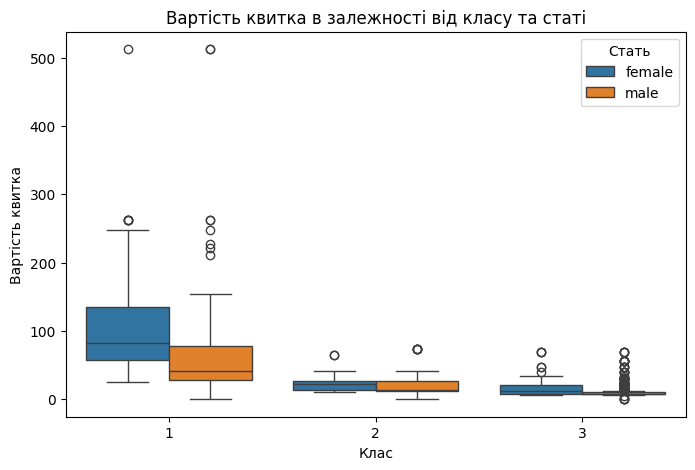

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["pclass"], y=df["fare"], hue=df["sex"])
plt.title("Вартість квитка в залежності від класу та статі")
plt.xlabel("Клас")
plt.ylabel("Вартість квитка")
plt.legend(title="Стать")
plt.show()

Значні викиди спостерігаються у вартості квитків ('fare'), що, ймовірно, пов’язано з класом пасажирів ('pclass'). Вік також містить викиди, але оскільки вони незначні і свідчать лише про малу кількість пасажирів віком 70+, їх можливо не варто видаляти.

Середній вік пасажирів становить від 20 до 50 років. Жінок у першому класі менше, ніж чоловіків, тоді як у другому класі їхня кількість приблизно однакова. У третьому класі чоловіків значно більше, а також спостерігається велика кількість викидів, хоча вони не є аномальними.

Більш аномальні викиди спостерігаються серед чоловіків і жінок першого класу, що, ймовірно, пов’язано з високою вартістю квитків.